In [53]:
"""
Inference & Representation HW3
Question 2 PCA and Non-negative matrix factorization.

"""

"""
Tools for loading the MNIST Data.
From Optimization Based Data Analysis HW1
@author: Brett
"""
import numpy as np
from mnist_tools import *
from plot_tools import *
import matplotlib.pyplot as plt

"""
Given train (in the format returned by load_train_data in mnist_tools), 
and a 1d numpy array testImage you should return a tuple (digit,imageIdx).  digit is
an integer giving the numerical digit value of the training image closest 
to the testImage in Euclidean distance.  imageIdx is the row number of the closest 
training image in the 2d array train[digit].
"""

"""
Assumes the data file is in 'mnist_all.mat'.
"""

datafile = "mnist_all.mat" #Change if you put the file in a different path
train = load_train_data(datafile)

trainarr=np.asarray(train)
trainarr = np.reshape(trainarr, (trainarr.shape[0]*trainarr.shape[1],-1))
trainarr = trainarr.astype(float)
trainarr=trainarr-trainarr.mean(axis=0)

In [35]:
def NMF(input_data, r=3, n_iters=10):
    X = input_data.copy()
    N, p = input_data.shape
    # Initialize W and H
    W = np.ones((N, r), dtype=np.float64)
    H = np.ones((r, p), dtype=np.float64)
    for _ in range(n_iters):
        # Update rows of W
        for k in range(r):
            H_rsum = np.sum(H[k,:])
            WH = np.dot(W,H)
            WH[np.where(WH==0)] +=0.001
            if(H_rsum!=0):
                W[:, k] = W[:, k] * np.sum(H[k,:]*(X/WH),1)/ H_rsum
        for k in range(r):
            W_rsum = np.sum(W[:,k])
            WH = np.dot(W,H)
            WH[np.where(WH==0)] +=0.001 
            if(W_rsum!=0.0):
                H[k, :] = H[k, :] * np.sum(W[:, k].reshape(N,1)*(X/WH),0)/W_rsum    
    return H

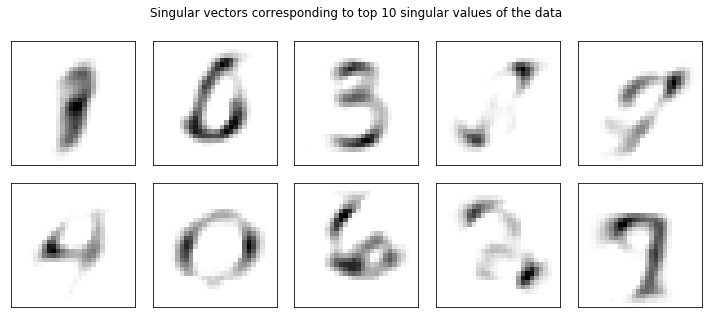

In [43]:
n=10
V = NMF(trainarr,n, n_iters=50)
imgs = [V[i,:] for i in range(n)]
plot_image_grid(imgs,"Singular vectors corresponding to top %d singular values of the data"%n)

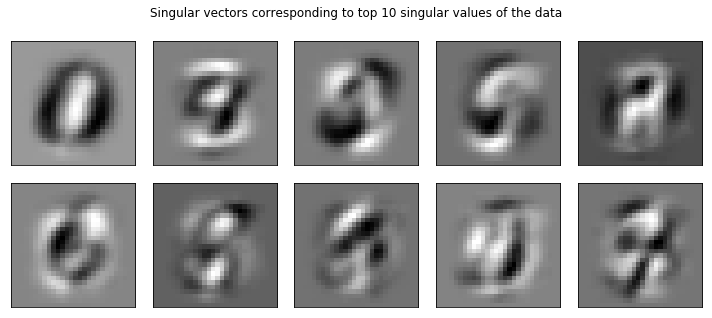

In [54]:
"""
Plot of the singular vectors corresponding 
to top 10 singular values of the data.
@author: Vlad 
"""
U, s, V = np.linalg.svd(trainarr, full_matrices=True)
n=10
imgs = [V[i,:] for i in range(n)]
plot_image_grid(imgs,
           "Singular vectors corresponding to top 10 singular values of the data")

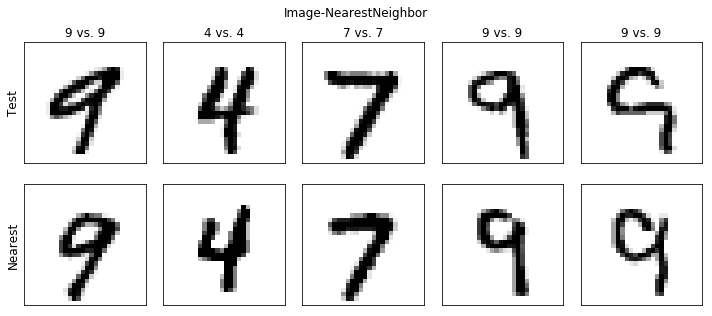

In [46]:
"""
Plot of the results of the nearest neighbour test applied 
to a principal component projection.
@author: Vlad 
"""

def project(V, Images) :
     return np.dot(V.T, np.dot(V, Images))
    
def compute_nearest_neighbors(train, testImage, V) :
    train=[np.array(i, dtype=float) for i in train]
    testImage= np.array(testImage, dtype=float)
    digit=0
    imageIdx=0
    dist=np.linalg.norm (project (V, train[digit][imageIdx])-project (V, testImage))
    for i in range(len(train)):
        for j in range (train[i].shape[0]):
            tempDist=np.linalg.norm (project(V,train[i][j])-project(V, testImage))
            if tempDist<dist:
                digit=i
                imageIdx =j
                dist= tempDist
    return digit, imageIdx 

n=8
U, s, V = np.linalg.svd(trainarr, full_matrices=False)
V=V[0:n,:]


test,testLabels = load_test_data(datafile)


imgs = []
TestLabels = []
for i in range(len(testLabels)) :
    trueDigit = testLabels[i]
    testImage = test[i]
    (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage,V)
    imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
    TestLabels.append(nnDig)

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,testLabels)]
plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)

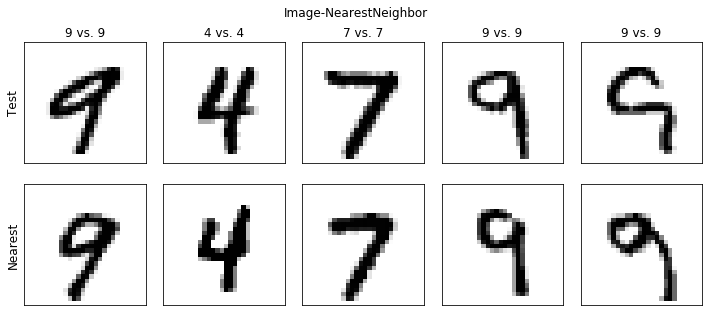

In [51]:
n=13
V = NMF(trainarr,n, n_iters=50)
imgs = [V[i,:] for i in range(n)]
test,testLabels = load_test_data(datafile)
imgs = []
TestLabels = []
for i in range(len(testLabels)) :
    trueDigit = testLabels[i]
    testImage = test[i]
    (nnDig,nnIdx) = compute_nearest_neighbors(train,testImage,V)
    imgs.extend( [testImage,train[nnDig][nnIdx,:]] )
    TestLabels.append(nnDig)

row_titles = ['Test','Nearest']
col_titles = ['%d vs. %d'%(i,j) for i,j in zip(testLabels,TestLabels)]
plot_image_grid(imgs,
                    "Image-NearestNeighbor",
                    (28,28),len(testLabels),2,True,row_titles=row_titles,col_titles=col_titles)